<a href="https://colab.research.google.com/github/LucasSFlores80/Mediciones-y-Ensayos-5-A-o/blob/main/Ensayo_de_Tracci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Carga de los datos del Simulador y Acondicionamiento de los datos

In [147]:
#Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
from scipy.stats import linregress

In [148]:
#Cargamos el archivo con los datos obtenidos en la simulación
data = pd.read_csv('/content/drive/MyDrive/Ensayos Mecánicos/Resultados_Trac.txt', delimiter = ";") #Acá se pone la ruta del archivo que ustedes generaron. El delimitador es ;
data #Mostramos los datos

,Mat.=SAE 1006,"diametro=12,77 mm",Long. Probeta=100 mm
0,#,Delta [mm],Fuerza [kg]
1,1,"0,002","51,55102"
2,2,"0,004","100,2203"
3,3,"0,006","160,4165"
4,4,"0,008","218,6916"
...,...,...,...
671,671,"24,722","3181,507"
672,672,"24,732","2887,66"
673,673,"24,742","2514,591"
674,674,"24,752","2052,737"


In [149]:
#El nombre de las columnas es información importante para poder realizar la práctica. Las imprimimos para no perder esta info.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Mat.=SAE 1006          676 non-null    object
 1    diametro=12,77 mm     676 non-null    object
 2    Long. Probeta=100 mm  676 non-null    object
dtypes: object(3)
memory usage: 16.0+ KB


In [150]:
#Cuando se genera el archivo, los nombres de las columnas no son las esperadas, sino que contiene los datos iniciales del experimento. Se renombran las columnas.
data_1 = data.rename(columns={'Mat.=SAE 1006':'Nº Medición',' diametro=12,77 mm':'Delta [mm]',' Long. Probeta=100 mm':'Fuerza [kgf]'})
data_1 = data_1.drop([0, 2],axis=0) #Eliminamos la primera fila completa.
data_1

,Nº Medición,Delta [mm],Fuerza [kgf]
1,1,"0,002","51,55102"
3,3,"0,006","160,4165"
4,4,"0,008","218,6916"
5,5,"0,01","261,5974"
6,6,"0,012","314,109"
...,...,...,...
671,671,"24,722","3181,507"
672,672,"24,732","2887,66"
673,673,"24,742","2514,591"
674,674,"24,752","2052,737"


In [151]:
#Los datos están con coma, los reemplazamos por ;
data_1['Delta [mm]'] = pd.to_numeric(data_1['Delta [mm]'].str.replace(',', '.'))
data_1['Fuerza [kgf]'] = pd.to_numeric(data_1['Fuerza [kgf]'].str.replace(',', '.'))

In [152]:
#Datos correctamente acomodados
data_1

,Nº Medición,Delta [mm],Fuerza [kgf]
1,1,0.002,51.55102
3,3,0.006,160.41650
4,4,0.008,218.69160
5,5,0.010,261.59740
6,6,0.012,314.10900
...,...,...,...
671,671,24.722,3181.50700
672,672,24.732,2887.66000
673,673,24.742,2514.59100
674,674,24.752,2052.73700


#Normalización de los datos y gráfico principal de Tensiones vs Alargamiento Específico

In [153]:
#Determinamos el área o sección inicial. Para ello usamos el dato del diámetro.
S0 = ((math.pi)*(12.77**2))/4
print ("La sección inicial S0 es",S0,"mm2")

La sección inicial S0 es 128.07715615989574 mm2


In [154]:
#Calculamos la tensión en MPa y el Alargamiento Específico. Lo agregamos a los datos originales.
data_1['A. Específico']=data_1['Delta [mm]']/100 #Se divide por la longitud inicial de la probeta
data_1['Tensión [MPa]']=(data_1['Fuerza [kgf]']*9.80665)/S0 # Se multiplica por 9.80665 para pasar los Kgf/mm2 a MPa

In [155]:
#Datos Finales
data_1

,Nº Medición,Delta [mm],Fuerza [kgf],A. Específico,Tensión [MPa]
1,1,0.002,51.55102,0.00002,3.947174
3,3,0.006,160.41650,0.00006,12.282819
4,4,0.008,218.69160,0.00008,16.744844
5,5,0.010,261.59740,0.00010,20.030068
6,6,0.012,314.10900,0.00012,24.050792
...,...,...,...,...,...
671,671,24.722,3181.50700,0.24722,243.602580
672,672,24.732,2887.66000,0.24732,221.103215
673,673,24.742,2514.59100,0.24742,192.537956
674,674,24.752,2052.73700,0.24752,157.174581


In [156]:
#Creamos los ejes x e y para graficar. El eje x es el alargamiento específico y el eje y es la tensión
x = data_1['A. Específico']
y = data_1['Tensión [MPa]']

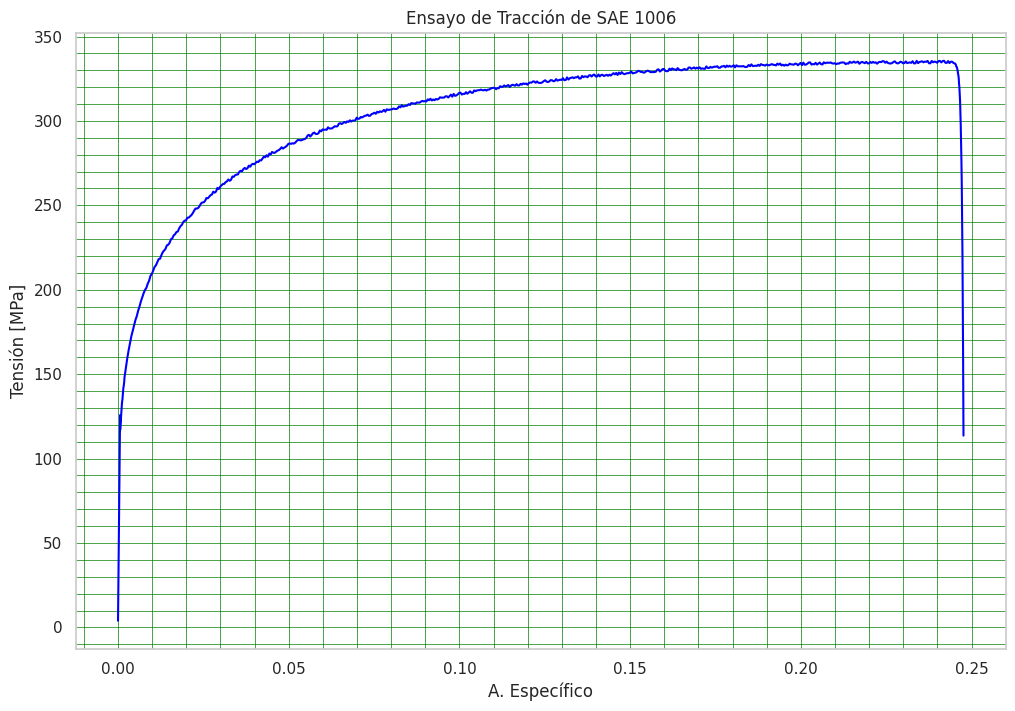

In [157]:
# Graficamos
plt.figure(figsize=(12,8))
plt.minorticks_on()
plt.grid(color='green', linewidth=0.5, which='both')
# Graficar una línea
plt.plot(x, y, color='blue')
# Añadir etiquetas y título
plt.xlabel('A. Específico')
plt.ylabel('Tensión [MPa]')
plt.title('Ensayo de Tracción de SAE 1006')
# Mostrar el gráfico
plt.show()

#Determinación de la Zona Elástica y Módulo de Young

Con el gráfico anterior, se debe observar en qué valores aproximados se encuentra la zona elástica. En este caso, La zona elástica llega hasta los 125 Mpa. Cortamos esa zona realizando una búsqueda ampliada para determinar, de paso, si existe una zona de fluencia.

In [158]:
busqueda = data_1[(data_1['Tensión [MPa]'] > 120) & (data_1['Tensión [MPa]'] < 140)]
print (busqueda)

   Nº Medición  Delta [mm]  Fuerza [kgf]  A. Específico  Tensión [MPa]
30          30       0.060      1576.309        0.00060     120.695299
31          31       0.062      1642.268        0.00062     125.745667
33          33       0.081      1589.397        0.00081     121.697425
34          34       0.094      1644.344        0.00094     125.904623
35          35       0.106      1687.733        0.00106     129.226845
36          36       0.119      1741.100        0.00119     133.313066
37          37       0.132      1765.488        0.00132     135.180413
38          38       0.144      1808.839        0.00144     138.499726


Vemos que el primer valor de 125 aparece en el número de medición 31 y la última en el valor 34. Vamos a realizar un corte de esos datos para poder estudiarlos. Al hacer el corte, tenemos que tener en cuenta que estamos trabajando con filas, por lo tanto, el 0 se cuenta. La medición 38 corresponde a la fila 37

In [159]:
corte_1 = data_1[:37]

In [160]:
corte_1.tail(10) #Tail muestra los últimos 10 datos del dataset

,Nº Medición,Delta [mm],Fuerza [kgf],A. Específico,Tensión [MPa]
29,29,0.058,1514.191,0.00058,115.939029
30,30,0.060,1576.309,0.00060,120.695299
31,31,0.062,1642.268,0.00062,125.745667
32,32,0.064,1525.601,0.00064,116.812674
33,33,0.081,1589.397,0.00081,121.697425
34,34,0.094,1644.344,0.00094,125.904623
35,35,0.106,1687.733,0.00106,129.226845
36,36,0.119,1741.100,0.00119,133.313066
37,37,0.132,1765.488,0.00132,135.180413
38,38,0.144,1808.839,0.00144,138.499726


Graficamos por Dispersión

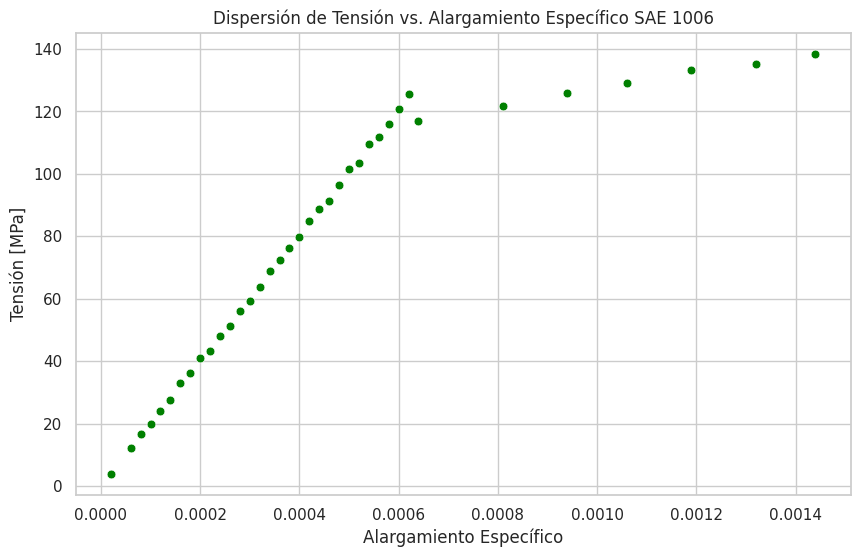

In [161]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
# Gráfico de dispersión
sns.scatterplot(
    x='A. Específico',
    y='Tensión [MPa]',
    data=corte_1,
    color='green',
    s=40  # tamaño de los puntos
)
# Etiquetas
plt.title('Dispersión de Tensión vs. Alargamiento Específico SAE 1006')
plt.xlabel('Alargamiento Específico')
plt.ylabel('Tensión [MPa]')
plt.show()

Se nota una recta muy marcada y luego observamos que la carga disminuye y el alargamiento aumenta. El penúltimo punto de la recta se considera como la Tensión al Límite de Proporcionalidad (medición 30) y el último lo vamos a considerar como la Tensión al Límite de Fluencia Superior (medición 31). Finalmente, para determinar el módulo de Young tomamos como límite la medición 29.

In [162]:
elastico = data_1[:28]

In [163]:
elastico.tail()

,Nº Medición,Delta [mm],Fuerza [kgf],A. Específico,Tensión [MPa]
25,25,0.050,1325.277,0.00050,101.474206
26,26,0.052,1350.893,0.00052,103.435579
27,27,0.054,1432.222,0.00054,109.662802
28,28,0.056,1459.758,0.00056,111.771187
29,29,0.058,1514.191,0.00058,115.939029


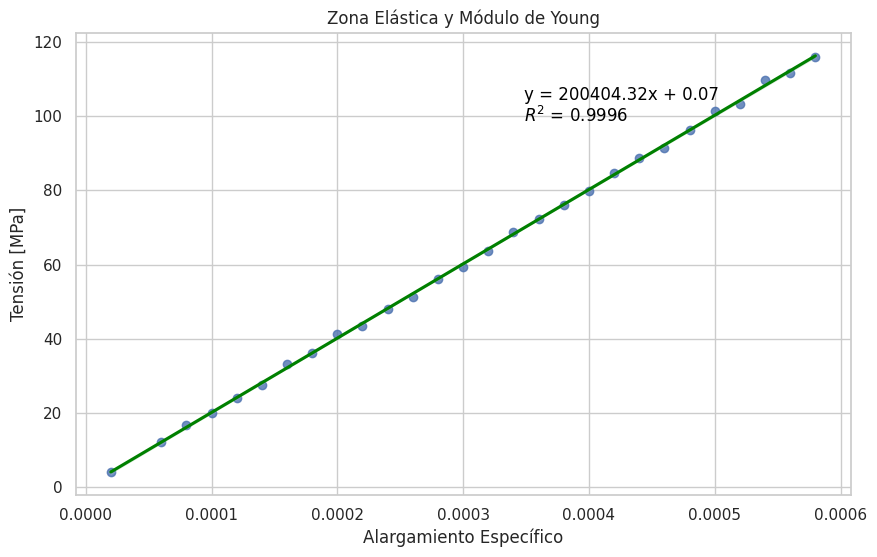

In [164]:
#Graficamos los puntos y realizamos un ajuste lineal
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
# Regresión lineal con seaborn
ax = sns.regplot(
    x='A. Específico',
    y='Tensión [MPa]',
    data=elastico,
    line_kws={'color': 'green'}
)
# Calcular regresión lineal con scipy
x = elastico['A. Específico']
y = elastico['Tensión [MPa]']
slope, intercept, r_value, _, _ = linregress(x, y)
# Crear ecuación y R²
ecuacion = f"y = {slope:.2f}x + {intercept:.2f}"
r2_text = f"$R^2$ = {r_value**2:.4f}"
# Agregar texto al gráfico
plt.text(x.max()*0.6, y.max()*0.9, ecuacion, fontsize=12, color='black')
plt.text(x.max()*0.6, y.max()*0.85, r2_text, fontsize=12, color='black')
# Títulos y etiquetas
ax.set_title('Zona Elástica y Módulo de Young')
ax.set_xlabel('Alargamiento Específico')
ax.set_ylabel('Tensión [MPa]')
plt.show()

Finalmente, el módulo de Young vale 200404 MPa que es lo mismo que 201 GPa aprox. Según bibliografía, el acero SAE 1006 es un acero de bajo contenido de carbono, muy dúctil y comúnmente utilizado en aplicaciones donde se requiere buena maleabilidad y soldabilidad. Su módulo de Young típico está en el rango de los 190 - 210 GPa


La Tensión al Límite de Proporcionalidad es el valor máximo de la recta que no se tuvo en cuenta para el cálculo y en este caso corresponde a la medición 30.

In [167]:
corte_1.tail (10)

,Nº Medición,Delta [mm],Fuerza [kgf],A. Específico,Tensión [MPa]
29,29,0.058,1514.191,0.00058,115.939029
30,30,0.060,1576.309,0.00060,120.695299
31,31,0.062,1642.268,0.00062,125.745667
32,32,0.064,1525.601,0.00064,116.812674
33,33,0.081,1589.397,0.00081,121.697425
34,34,0.094,1644.344,0.00094,125.904623
35,35,0.106,1687.733,0.00106,129.226845
36,36,0.119,1741.100,0.00119,133.313066
37,37,0.132,1765.488,0.00132,135.180413
38,38,0.144,1808.839,0.00144,138.499726


In [121]:
print('Tensión al Límite de Proporcionalidad = 120.7 MPa')

Tensión al Límite de Proporcionalidad = 120.7 MPa


#Zona de Fluencia

La Zona de Fluencia no suele ser muy común en los aceros y muchos de los metales que vamos a estudiar. Sin embargo vamos a analizar si existe y se puede determinar para este ejemplo.

Del gráfico de dispersión que se obtuvo de en la sección anterior se puede observar:

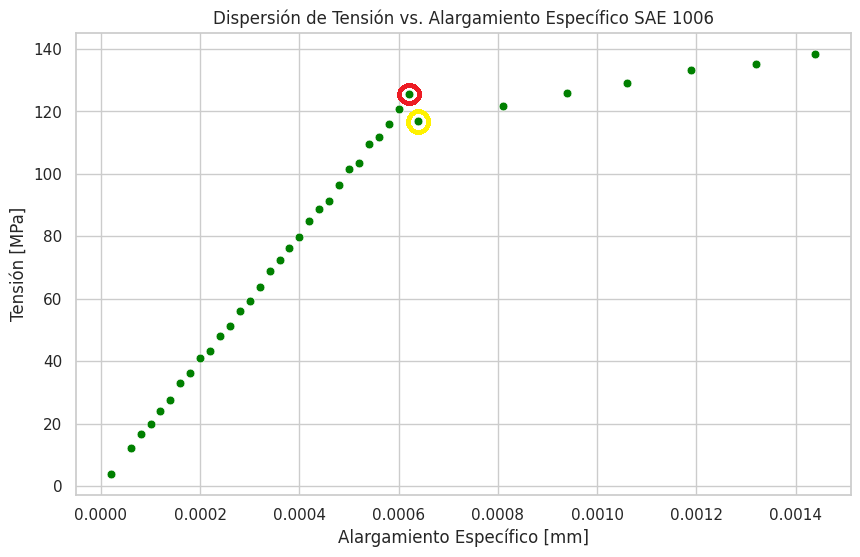

El Punto marcado en Rojo indica la Tensión al Límite de Fluencia Superior y el punto marcado en amarillo indica la Tensión al Límite de Fluencia Inferior. En el set de datos corresponde a la medición 31 y 32.

In [168]:
print ('Tensión al Límite de Fluencia Supererior = 125.75 MPa')
print ('Tensión al Límite de Fluencia Inferior = 116.81 MPa')

Tensión al Límite de Fluencia Supererior = 125.75 MPa
Tensión al Límite de Fluencia Inferior = 116.81 MPa


#Tensión Máxima o Resistencia Estática a la Tracción. Tensión de Rotura Convencional

Este valor es el que corresponde a la carga máxima que resiste el material antes de romperse. Es el valor máximo del set de datos.

In [169]:
data_1.max() #Acá muestra el máximo de todas las columnas, no significa que coincidan todos.

,0
Nº Medición,99
Delta [mm],24.762
Fuerza [kgf],4383.76
A. Específico,0.24762
Tensión [MPa],335.657047


La tensión de 335.657047 MPa está en la medición:

In [170]:
maximo = data_1[data_1['Tensión [MPa]']>=335.65]
maximo

,Nº Medición,Delta [mm],Fuerza [kgf],A. Específico,Tensión [MPa]
642,642,24.192,4383.76,0.24192,335.657047


Según bibliografía, el acero SAE 1006 tiene una resistencia a la tracción típica de 330 MPa. En este ejemplo es de 336 aproximadamente.

Para determinar la Tensión de Rotura Convencional volvemos a estudiar el gráfico del ensayo.

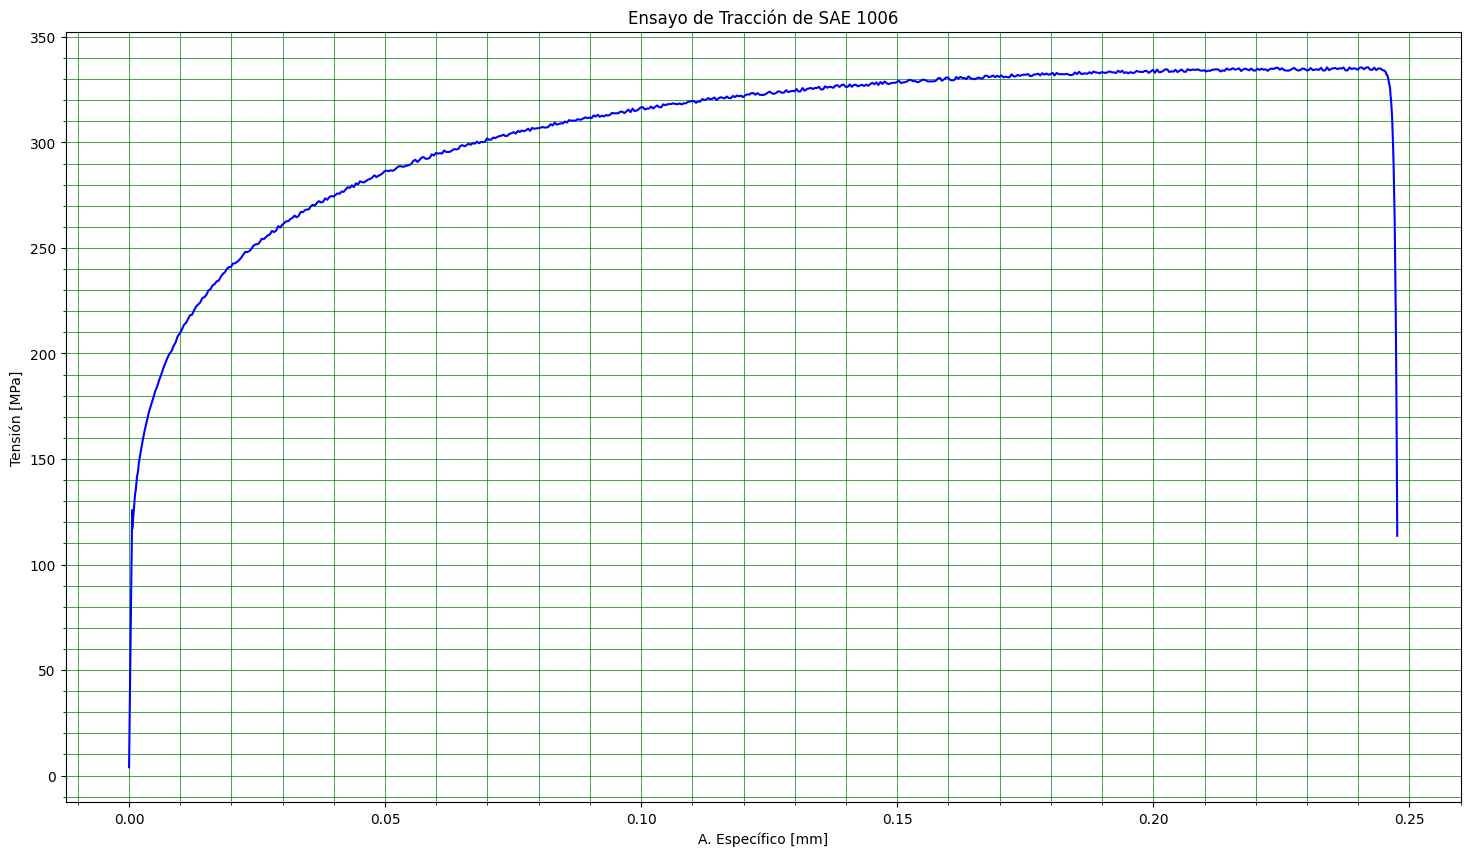

Se oberva que este valor se encuentra entre el alargamiento específico 0.24 y 0.25. Filtamos esos datos

In [186]:
busqueda_1 = data_1[(data_1['A. Específico'] > 0.24) & (data_1['A. Específico'] <0.25)]
busqueda_1

,Nº Medición,Delta [mm],Fuerza [kgf],A. Específico,Tensión [MPa]
638,638,24.032,4381.121,0.24032,335.454983
639,639,24.072,4382.424,0.24072,335.554752
640,640,24.112,4370.917,0.24112,334.673680
641,641,24.152,4381.182,0.24152,335.459654
642,642,24.192,4383.760,0.24192,335.657047
643,643,24.232,4368.405,0.24232,334.481341
644,644,24.272,4367.136,0.24272,334.384175
645,645,24.312,4381.235,0.24312,335.463712
646,646,24.352,4365.873,0.24352,334.287470
647,647,24.392,4376.125,0.24392,335.072448


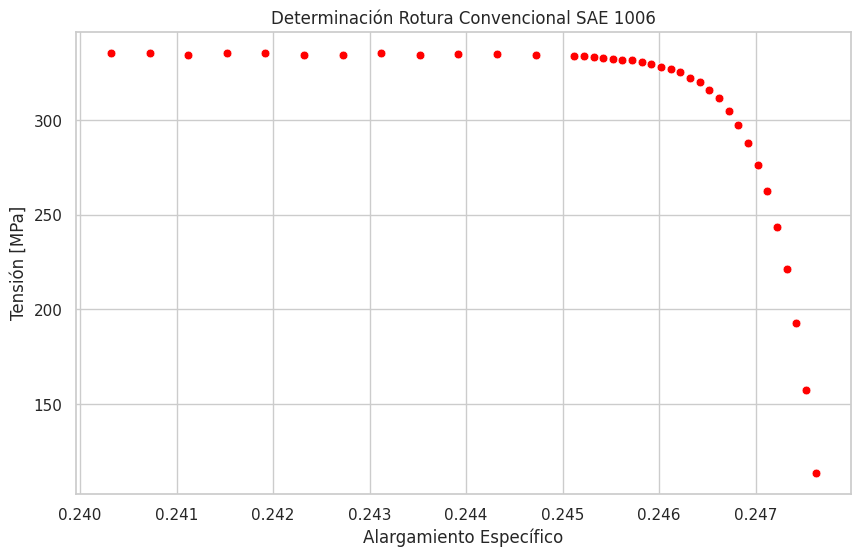

In [185]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
# Gráfico de dispersión
sns.scatterplot(
    x='A. Específico',
    y='Tensión [MPa]',
    data=busqueda_1,
    color='red',
    s=40  # tamaño de los puntos
)
# Etiquetas
plt.title('Determinación Rotura Convencional SAE 1006')
plt.xlabel('Alargamiento Específico')
plt.ylabel('Tensión [MPa]')
plt.show()

Por lo que se ve, la Tensión de Rotura Convencional se encuentra entre los 290 y 305 MPa. Valores menores que el calculado como Tensión de Rotura (335 MPa).